<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project1</h3>
</div>

<img src = "https://www.eesc.europa.eu/sites/default/files/styles/large/public/images/shutterstock_1642888921.jpg?itok=P9-6YhGd" width=50%>

## Importing the libraries

In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [2]:
df = pd.read_csv('country_vaccinations.csv')

## EDA

In [3]:
print ('\n======================================= ((((( 5 First Records ))))) =======================================\n')
print(df.head())

print ('\n======================================= ((((( 5 Last Records ))))) =======================================\n')
print(df.tail())

print ('\n======================================= ((((( 5 Sample Records ))))) =======================================\n')
print(df.sample(5))

print ('\n======================================= ((((( Information of DataFrame ))))) =======================================\n')
print(df.info())

print ('\n======================================= ((((( Statistical description ))))) =======================================\n')
print(df.describe())

print ('\n======================================= ((((( Shape Of DataFrame ))))) =======================================\n')
print(df.shape)

print ('\n======================================= ((((( Columns Of DataFrame ))))) =======================================\n')
print(df.columns)

print ('\n======================================= ((((( Type Of DataFrame ))))) =======================================\n')
print(df.dtypes)

print ('\n=========================== ((((( Identifying the unique number of values in DataFrame ))))) ===========================\n')
print(df.nunique())

print ('\n=================================== ((((( correlation between the features ))))) ===================================\n')
corr = df.corr()
print(corr)



======================================= ((((( 5 First Records ))))) =======================================

       country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN 

## Data Preprocessing

In [4]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df['Day'] = df['date'].dt.day
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year

data = df[['country','vaccines','Day','Month','Year','people_vaccinated_per_hundred']]

data['people_vaccinated_per_hundred'] = data['people_vaccinated_per_hundred'].fillna(0)

le = LabelEncoder()
data['country'] = le.fit_transform(data['country'])
data['vaccines'] = le.fit_transform(data['vaccines'])

le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

data

,country,vaccines,Day,Month,Year,people_vaccinated_per_hundred
0,0,17,22,2,2021,0.00
1,0,17,23,2,2021,0.00
2,0,17,24,2,2021,0.00
3,0,17,25,2,2021,0.00
4,0,17,26,2,2021,0.00
...,...,...,...,...,...,...
31235,217,50,11,7,2021,6.03
31236,217,50,12,7,2021,6.23
31237,217,50,13,7,2021,6.43
31238,217,50,14,7,2021,6.65


## Strorytelling - Visualization


============================== (((((the heatmap of correlation between the features ))))) ============================


Text(0, 0.5, 'people_fully_vaccinated_per_hundred')

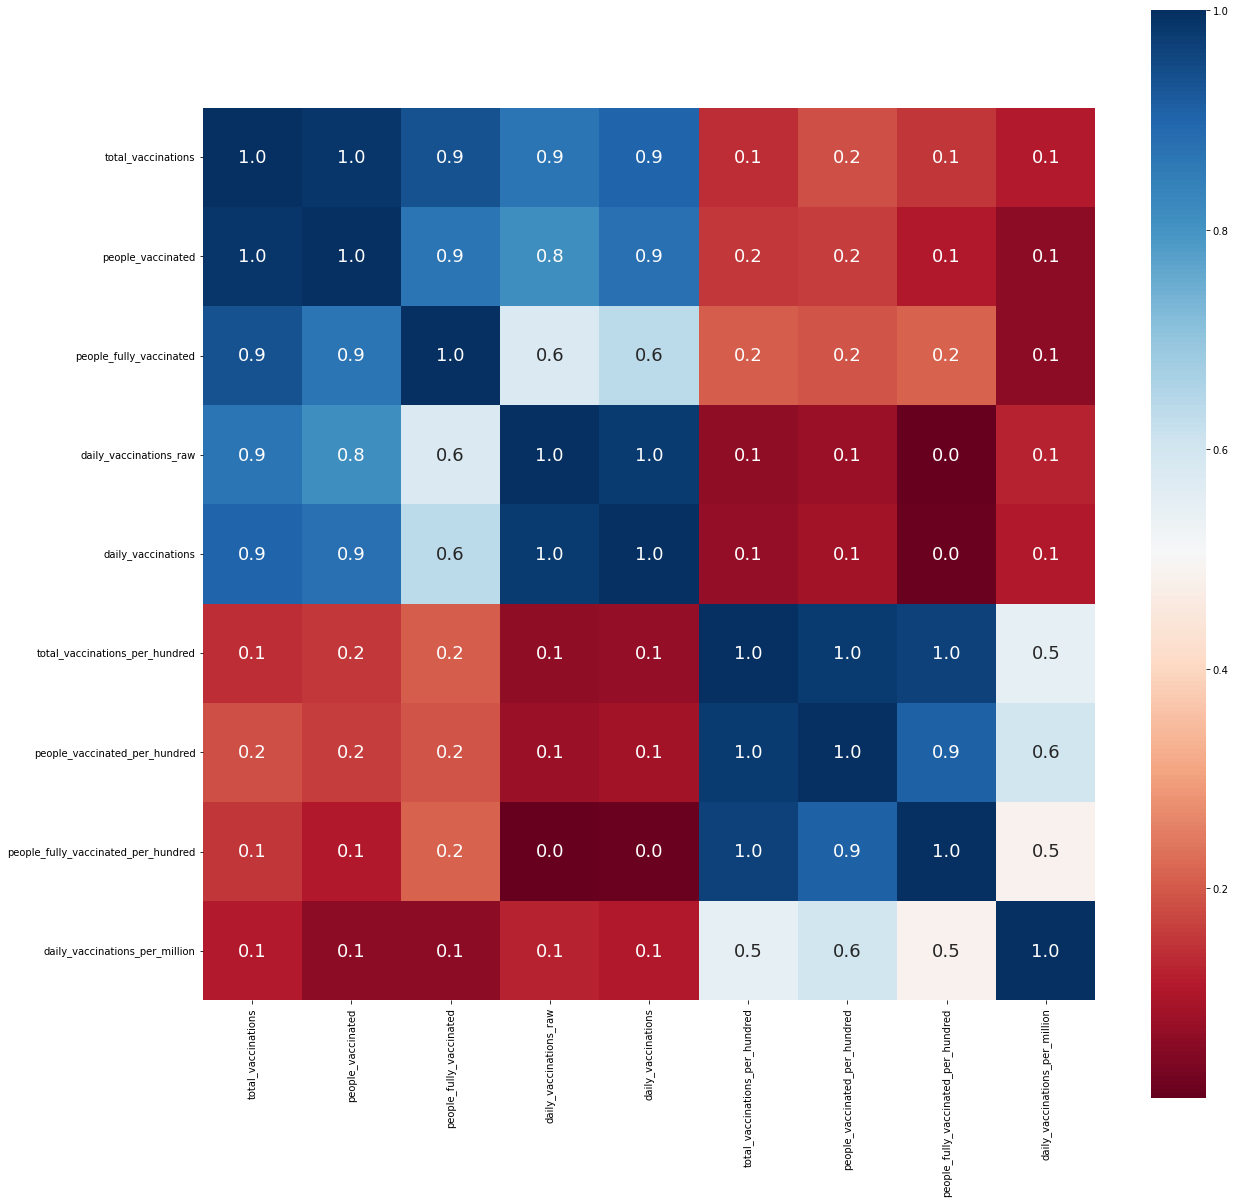

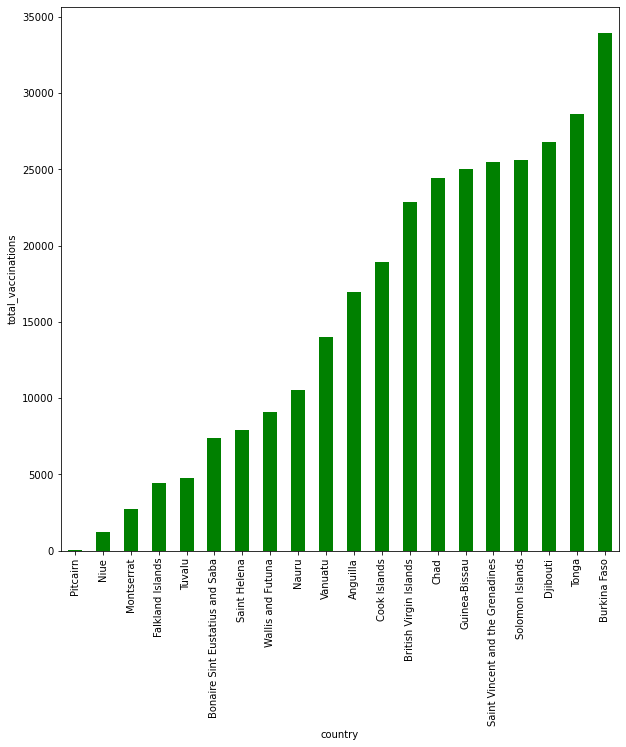

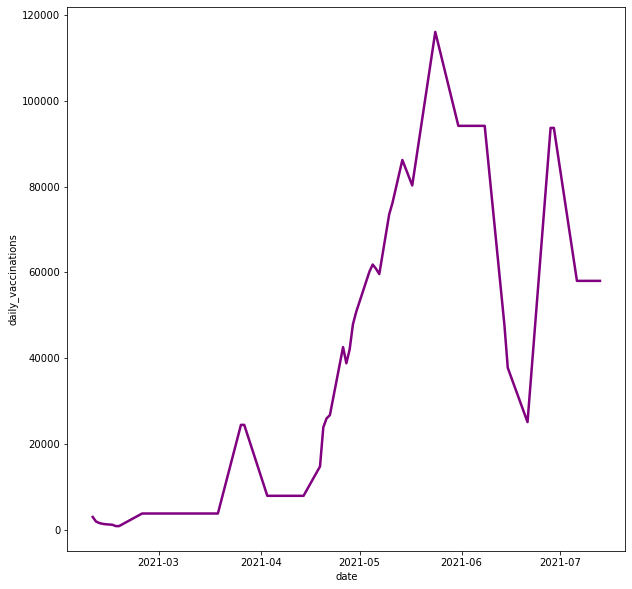

<Figure size 720x720 with 0 Axes>

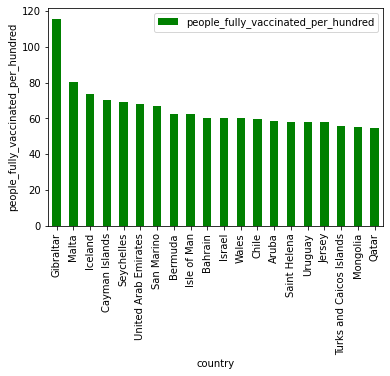

In [5]:
print ('\n============================== (((((the heatmap of correlation between the features ))))) ============================')
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':18}, cmap='RdBu');

plt.figure(figsize=(10,10))
count_total_v = df.groupby(['country'])['total_vaccinations'].max().sort_values().head(20)
count_total_v.plot(kind = 'bar',color='green')
plt.xlabel('country')
plt.ylabel('total_vaccinations')

plt.figure(figsize=(10,10))
Dai_Vac = df[df['country'] =='Iran']
sns.lineplot(data =Dai_Vac, x='date', y='daily_vaccinations', linewidth=2.5,color='purple')

plt.figure(figsize=(10,10))
fully_vaccinated_per_hundred = df[['country','people_fully_vaccinated_per_hundred']]
fully_vaccinated_per_hundred = fully_vaccinated_per_hundred.groupby('country').max()
fully_vaccinated_per_hundred.sort_values(by="people_fully_vaccinated_per_hundred", ascending=False, inplace=True)
fully_vaccinated_per_hundred = fully_vaccinated_per_hundred[:20].sort_values(by="people_fully_vaccinated_per_hundred",ascending=False)
fully_vaccinated_per_hundred.plot(kind = 'bar',color='green')
plt.xlabel('country')
plt.ylabel('people_fully_vaccinated_per_hundred')



## Prepare Data for Machine learning

In [6]:
X=data[['country','vaccines','Day','Month','Year']]
Y=data['people_vaccinated_per_hundred']

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24992, 5)
(6248, 5)
(24992,)
(6248,)


## Train your model

In [7]:

from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest Regressor
rf = RandomForestRegressor()
# Train the model using the training sets 
rf.fit(X_train, y_train)


from sklearn.tree import DecisionTreeRegressor
# Create a Decision Tree Regressor
dt = DecisionTreeRegressor()
# Train the model using the training sets 
dt.fit(X_train, y_train)

# Import library for Linear Regression
from sklearn.linear_model import LinearRegression
# Create a Linear regressor
mlr = LinearRegression()
# Train the model using the training sets 
mlr.fit(X_train, y_train);


from sklearn.neighbors import KNeighborsRegressor
# Create a KNeighbors regressor
neigh = KNeighborsRegressor(n_neighbors=2)
# Train the model using the training sets 
neigh.fit(X_train, y_train);

## Test the model and show the metrics

In [8]:
print('======================================RandomForestRegressor===============================')

# Model prediction on test data
y_pred = rf.predict(X_test)
# Model Evaluation
print('R^2:',metrics.r2_score(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('======================================DecisionTreeRegressor===============================')

y_pred = dt.predict(X_test)
# Model Evaluation
print('R^2:',metrics.r2_score(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('======================================KNeighborsregressor===============================')

y_pred = neigh.predict(X_test)
# Model Evaluation
print('R^2:',metrics.r2_score(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('======================================LinearRegression===============================')

y_pred = mlr.predict(X_test)
# Model Evaluation
print('R^2:',metrics.r2_score(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



======================================RandomForestRegressor===============================
R^2: 0.7575416731876339
MAE: 3.051550368117798
MSE: 77.97482937237356
RMSE: 8.830335745166973
======================================DecisionTreeRegressor===============================
R^2: 0.6331432109701088
MAE: 3.0035707426376437
MSE: 117.98149358194624
RMSE: 10.861928630862304
======================================KNeighborsregressor===============================
R^2: 0.5146711026891992
MAE: 5.790694622279129
MSE: 156.0822367077465
RMSE: 12.493287666092801
======================================LinearRegression===============================
R^2: 0.1524842566031751
MAE: 11.728235775906894
MSE: 272.56187218065554
RMSE: 16.509447967168846


## Save your final model

In [13]:
# save
with open('RandomForestRegressor2.pkl','wb') as f:
    pickle.dump(rf,f)
with open('DecisionTreeRegressor.pkl','wb') as f:
    pickle.dump(dt,f)
with open('KNeighborsregressor.pkl','wb') as f:
    pickle.dump(neigh,f)
with open('LinearRegression.pkl','wb') as f:
    pickle.dump(mlr,f)

## Send us the Result (Maktabkhoone)